<a href="https://colab.research.google.com/github/ethannorona/C_113_Project/blob/main/C_112_Project_C_113_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statistics
import pandas as pd
import plotly.express as px

from google.colab import files
data_to_load = files.upload()

df = pd.read_csv("savings_data.csv")
fig = px.scatter(df, y = "quant_saved", color = "wealthy")
fig.show()

Saving savings_data.csv to savings_data.csv


In [ ]:
import csv

with open('savings_data.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

all_savings = []

for data in savings_data:
  all_savings.append(float(data[0]))

mean_of_data = statistics.mean(all_savings)
median_of_data = statistics.median(all_savings)
mode_of_data = statistics.mode(all_savings)

print(f"Mean of data:- {mean_of_data}")
print(f"Median data:- {median_of_data}")
print(f"Mode data:- {mode_of_data}")

Mean of data:- 85.32780331328739
Median data:- 39.2724
Mode data:- 0.0


In [ ]:
wealthy_savings = [] 
not_wealthy_savings = []

for data in savings_data:
  if int(data[3]) == 1:
    wealthy_savings.append(float(data[0]))
  else:
    not_wealthy_savings.append(float(data[0]))

print("Results for people who are wealthy")
print(f"Mean of savings:- {statistics.mean(wealthy_savings)}")
print(f"Median of savings:- {statistics.median(wealthy_savings)}")
print(f"Mode of savings:- {statistics.mode(wealthy_savings)}")
print("\n")
print("Results for people who who are not wealthy")
print(f"Mean of savings:- {statistics.mean(not_wealthy_savings)}")
print(f"Median of savings:- {statistics.median(not_wealthy_savings)}")
print(f"Mode of savings:- {statistics.mode(not_wealthy_savings)}")

Results for people who are wealthy
Mean of savings:- 78.61157672384391
Median of savings:- 39.2724
Mode of savings:- 2.284


Results for people who who are not wealthy
Mean of savings:- 87.22929365730847
Median of savings:- 39.2724
Mode of savings:- 0.0


In [ ]:
print(f"Standard Deviation of all the data:- {statistics.stdev(all_savings)}")
print(f"Standard Deviation of people who are wealthy:- {statistics.stdev(wealthy_savings)}")
print(f"Standard Deviation of people who are not wealthy:- {statistics.stdev(not_wealthy_savings)}")

Standard Deviation of all the data:- 196.75453011909315
Standard Deviation of people who are wealthy:- 164.58072141099734
Standard Deviation of people who are not wealthy:- 204.91519933877308


In [ ]:
import numpy as np

gender = []
savings = []

for data in savings_data:
  if float(data[0]):
    gender.append(float(data[1]))
    savings.append(float(data[0]))

correlation = np.corrcoef(gender, savings)
print(f"Correlation between the gender of a person and their savings is:- {correlation[0,1]}")

Correlation between the gender of a person and their savings is:- -0.05429089147771469


In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

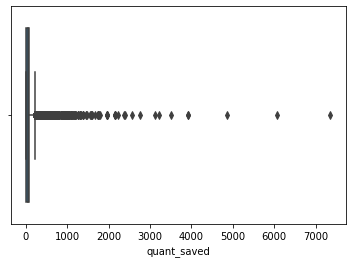

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x=df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [ ]:
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of Savings - {statistics.mean(all_savings)}")
print(f"Median of Savings - {statistics.median(all_savings)}")
print(f"Mode of Savings - {statistics.mode(all_savings)}")
print(f"Standard Deviation of Savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of Savings - 46.200519389818794
Median of Savings - 36.0475
Mode of Savings - 0.0
Standard Deviation of Savings - 50.866871917288634


In [ ]:
import random
import plotly.graph_objects as go

sampling_mean_list = []

for i in range(1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sample)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0,0.1], mode="lines", name="MEAN"))
fig.show()

In [ ]:
print(f"Standard Deviation of Samplinng - {statistics.stdev(sampling_mean_list)}")

Standard Deviation of Samplinng - 5.0824424623512945


In [ ]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling - 46.22874577445013


In [ ]:
temp_df = new_df[new_df.female != 2]

female = temp_df["female"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(female,savings)
print(f"Correlation between the gender of a person to their savings is - {correlation[0,1]}")

Correlation between the gender of a person to their savings is - -0.01579843642688189


In [ ]:
gender_male_df = new_df.loc[new_df["female"] == 0]
gender_female_df = new_df.loc[new_df["female"] == 1]

print(gender_male_df.head())
print(gender_female_df.head())

    quant_saved  female  highschool_completed  wealthy
1     39.272400       0                     1        1
8      2.284000       0                     1        1
10    58.908600       0                     1        1
17     2.284000       0                     1        1
28    47.178078       0                     0        0
   quant_saved  female  highschool_completed  wealthy
0      13.0908       1                     0        0
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1


In [32]:
fig = ff.create_distplot([gender_male_df["quant_saved"].tolist()], ["Savings (Male)"], show_hist=False)
fig.show()

In [35]:
gender_male_savings = gender_male_df["quant_saved"].tolist()

sampling_mean_list_gender_male = []
for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(gender_male_savings))
  sampling_mean_list_gender_male.append(statistics.mean(temp_list))

mean_sampling_gender_male = statistics.mean(sampling_mean_list_gender_male)
stdev_sampling_gender_male = statistics.stdev(sampling_mean_list_gender_male)
print(f"Mean of Sampling (Male) - {mean_sampling_gender_male}")
print(f"Standard Deviation of Sampling (Male) - {stdev_sampling_gender_male}")

fig = ff.create_distplot([sampling_mean_list_gender_male], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling_gender_male, mean_sampling_gender_male], y=[0,0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Male) - 47.08069554180723
Standard Deviation of Sampling (Male) - 5.356176432427374


In [38]:
first_std_deviation_start = mean_sampling_gender_male - stdev_sampling_gender_male
first_std_deviation_end = mean_sampling_gender_male + stdev_sampling_gender_male
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_gender_male - (2*stdev_sampling_gender_male)
second_std_deviation_end = mean_sampling_gender_male + (2*stdev_sampling_gender_male)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_gender_male - (3*stdev_sampling_gender_male)
third_std_deviation_end = mean_sampling_gender_male + (3*stdev_sampling_gender_male)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 41.724519109379855 and First (end) - 52.436871974234606
Second (start) - 36.36834267695248 and Second (end) - 57.79304840666198
Third (start) - 31.01216624452511 and Third (end) - 63.14922483908936


In [39]:
gender_female_savings = gender_female_df["quant_saved"].tolist()

sampling_mean_list_gender_female = []
for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(gender_female_savings))
  sampling_mean_list_gender_female.append(statistics.mean(temp_list))

mean_sampling_gender_female = statistics.mean(sampling_mean_list_gender_female)
stdev_sampling_gender_female = statistics.stdev(sampling_mean_list_gender_female)
print(f"Mean of Sampling (Female) - {mean_sampling_gender_female}")
print(f"Standard Deviation of Sampling (Female) - {stdev_sampling_gender_female}")

fig = ff.create_distplot([sampling_mean_list_gender_female], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling_gender_female, mean_sampling_gender_female], y=[0,0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Female) - 45.74161374156341
Standard Deviation of Sampling (Female) - 4.91824658601906


In [48]:
z_score = (mean_sampling_gender_male - mean_sampling_gender_female) / stdev_sampling_gender_female
print(f"Z Score is - {z_score}") 

Z Score is - 0.2722681298758754


# Conclusion
From the analysis we concluded that there wasn't a major difference between people who are male with their saving against people who are female with their saving. 

With the Z-Score test it confirms that there is not much different. The Z-Score is around 0.3 and only when the Z-Score is greater than 2 is the change consider as important.

Even though people who are male had a little increase in savings, there is still no important impact. We also saw that there wasn't any direct correlation between the gender of the people and the money that they save.